In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
# Loan_ID					Unique Loan ID
# Gender					Male/ Female
# Married					Applicant married (Y/N)
# Dependents				Number of dependents
# Education					Applicant Education (Graduate/ Under Graduate)
# Self_Employed				Self employed (Y/N)
# ApplicantIncome			Applicant income
# CoapplicantIncome			Coapplicant income
# LoanAmount				Loan amount in thousands
# Loan_Amount_Term			Term of loan in months
# Credit_History			(1- has all debts paid, 0- not paid)
# Property_Area				Urban/ Semi Urban/ Rural
# Loan_Status				(Target) Loan approved (Y/N)

In [20]:
# Load the data
main_loan_df = pd.read_csv("Loan_Data.csv")
train_df = main_loan_df
train_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [21]:
# copying data to new variables 
loan_df = main_loan_df.copy()

In [22]:
############ Count number of Categorical and Numerical Columns ######################
train_df = train_df.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
#categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']

print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


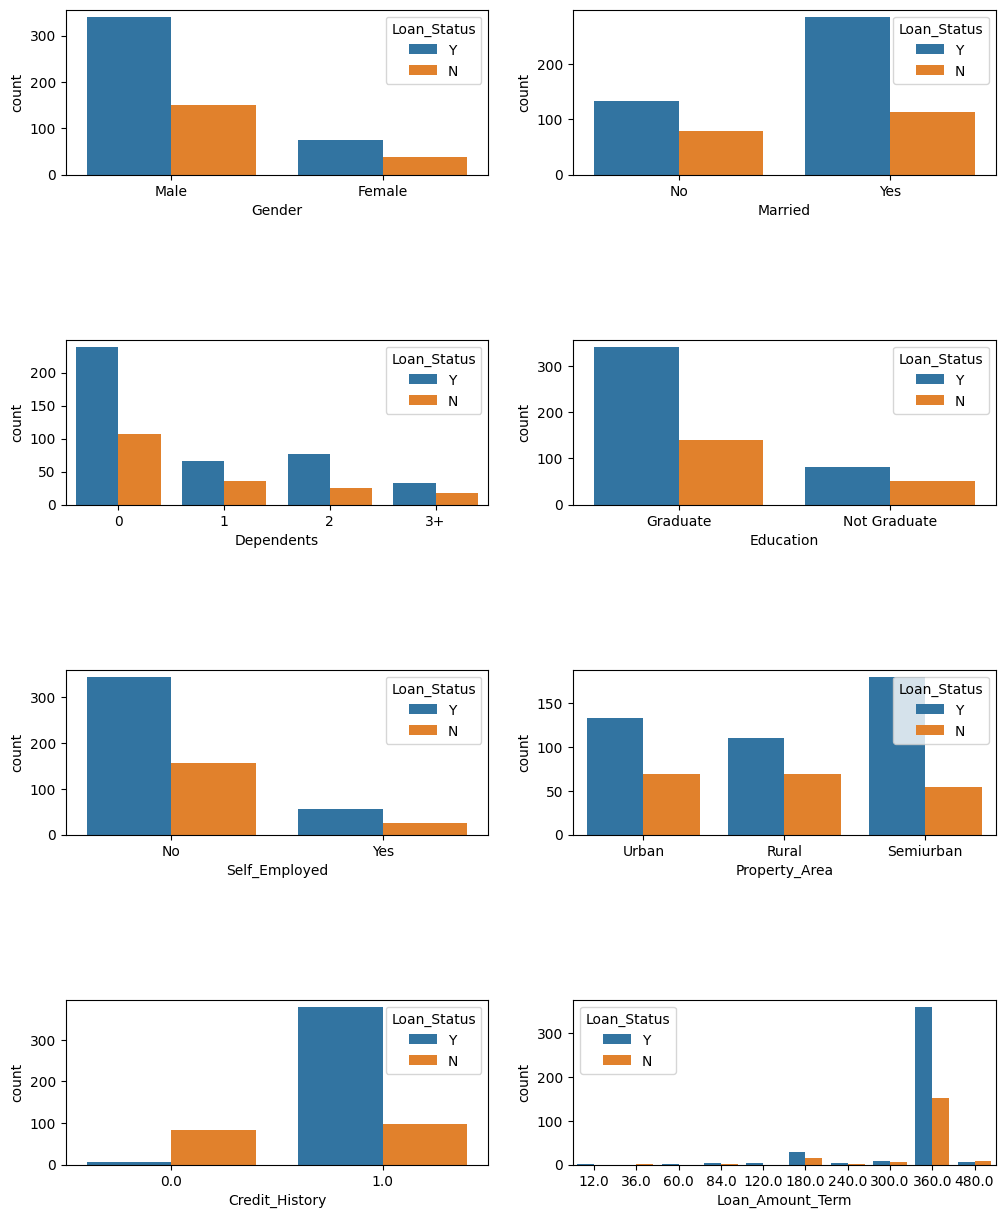

In [23]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 4x2 grid of subplots for visualizing categorical columns with respect to the target variable (Loan_Status)
fig, axes = plt.subplots(4, 2, figsize=(12, 15))

# Loop through each categorical column and create a countplot with hue as Loan_Status
for idx, cat_col in enumerate(categorical_columns):
    row, col = idx // 2, idx % 2
    sns.countplot(x=cat_col, data=train_df, hue='Loan_Status', ax=axes[row, col])

# Adjust the spacing between subplots for better readability
plt.subplots_adjust(hspace=1)


       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


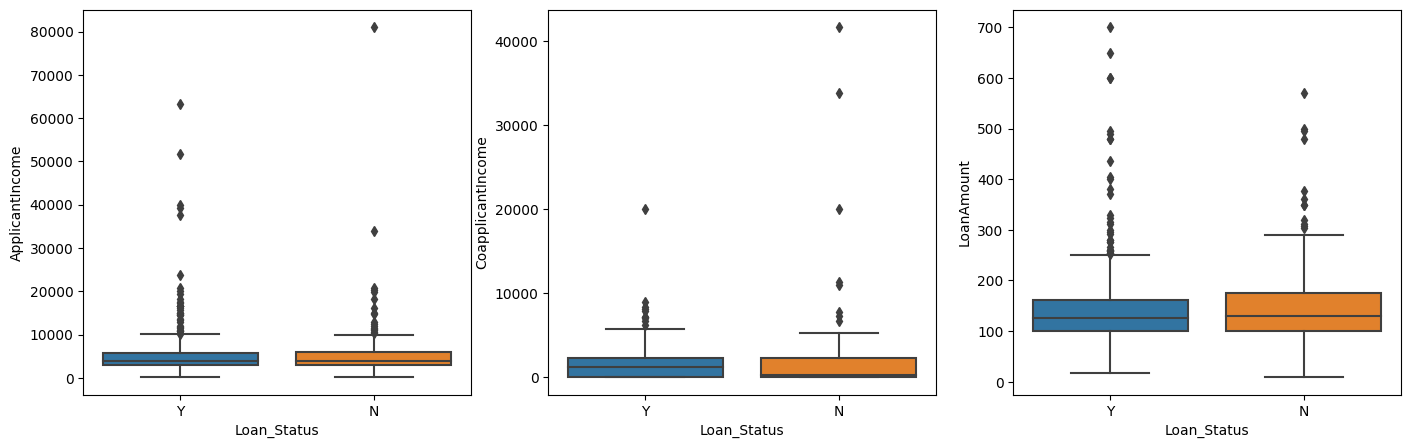

In [24]:
# Create a 1x3 grid of subplots for visualizing numerical columns with respect to the target variable (Loan_Status)
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

# Loop through each numerical column and create a boxplot with x-axis as Loan_Status
for idx, cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col, data=train_df, x='Loan_Status', ax=axes[idx])

# Print descriptive statistics for the numerical columns
print(train_df[numerical_columns].describe())

# Adjust the spacing between subplots for better readability
plt.subplots_adjust(hspace=1)

In [25]:
# Preprocessing for the decision tree algorithm: Encoding categorical features
# Convert categorical variables into binary variables using one-hot encoding
# This simplifies the input for the decision tree and helps improve its performance
# Avoid multicollinearity by dropping the first level of each categorical feature
train_df_encoded = pd.get_dummies(train_df, drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,True,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,True,True,True,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,True,True,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,True,True,False,False,False,True,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,False,False,False,True,True


In [32]:
# Preparing the data for the decision tree algorithm: Split features and target variable
# Store all features except Loan_Status_Y in variable X
X = train_df_encoded.drop(columns='Loan_Status_Y')
# Store the target variable Loan_Status_Y in variable y
y = train_df_encoded['Loan_Status_Y']

# Split data into train and test sets
from sklearn.model_selection import train_test_split
# Split the data into 80% training and 20% testing sets, stratifying on the target variable, and using a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Preparing the data for the decision tree algorithm: Handle/impute missing values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)

# Transform the training and test data using the fitted imputer
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)

In [33]:
# Import necessary libraries for the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score

# Create a DecisionTreeClassifier instance
tree_clf = DecisionTreeClassifier()

# Train the decision tree on the training data
tree_clf.fit(X_train, y_train)

# Make predictions on the training data
y_pred = tree_clf.predict(X_train)

# Calculate and print the accuracy and F1 score on the training data
print("Training Data Set Accuracy: ", accuracy_score(y_train, y_pred))
print("Training Data F1 Score ", f1_score(y_train, y_pred))

# Calculate and print the mean F1 score and mean accuracy using 5-fold cross-validation on the training data
print("Validation Mean F1 Score: ", cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='f1_macro').mean())
print("Validation Mean Accuracy: ", cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='accuracy').mean())


Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6565164946015271
Validation Mean Accuracy:  0.7107812822098536


<Axes: xlabel='Max_Depth', ylabel='Values'>

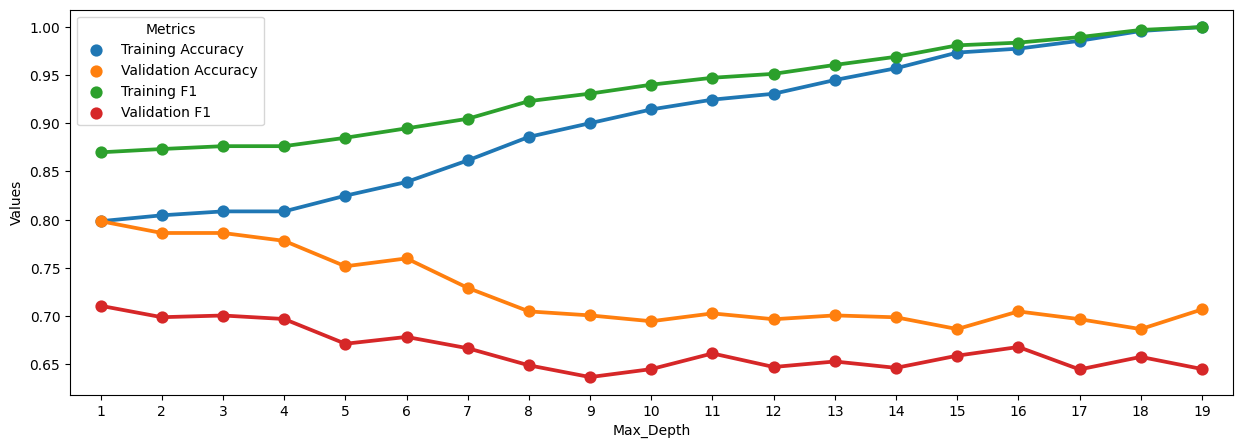

In [34]:
# Initialize lists to store training and validation accuracy, F1 scores, and tree depths
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

# Train and evaluate decision tree models with different max_depth values from 1 to 20
for depth in range(1, 20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train, y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train, y_training_pred)
    train_f1 = f1_score(y_train, y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='accuracy').mean()

    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)

# Store the collected metrics and max_depth values in a dictionary and convert it to a DataFrame
Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1": val_f1, "Max_Depth": tree_depths}
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

# Melt the DataFrame for easy plotting with seaborn
plot_df = Tuning_Max_depth_df.melt('Max_Depth', var_name='Metrics', value_name="Values")

# Plot the metrics against max_depth to visualize the impact of max_depth on model performance
fig, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x="Max_Depth", y="Values", hue="Metrics", data=plot_df, ax=ax)


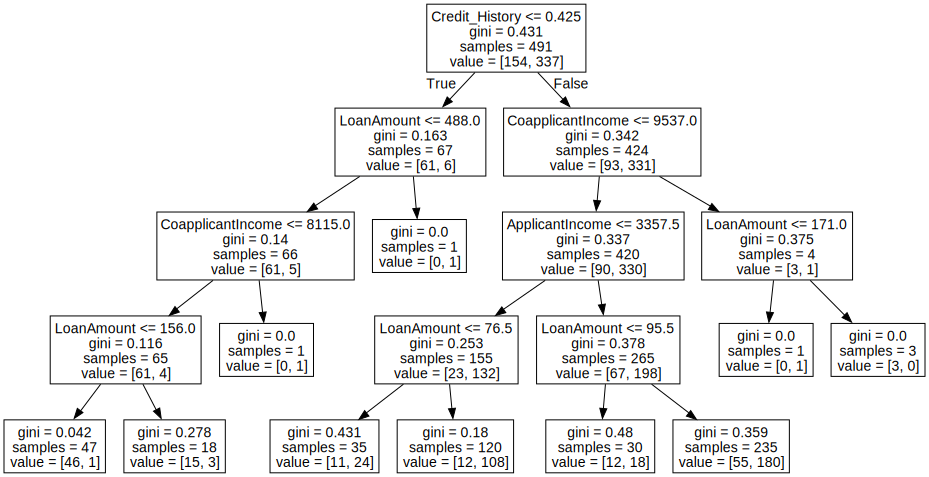

In [29]:
# Import necessary libraries for visualizing the decision tree
import graphviz as gv
from sklearn import tree

# Train a DecisionTreeClassifier with max_depth set to 4
tree_clf = tree.DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)

# Export the decision tree to DOT format
dot_data = tree.export_graphviz(tree_clf, feature_names=X.columns.tolist())

# Create a Graphviz source object from the DOT data and render decision tree
graph = gv.Source(dot_data)
graph

<Axes: xlabel='Min_Samples_leaf', ylabel='Values'>

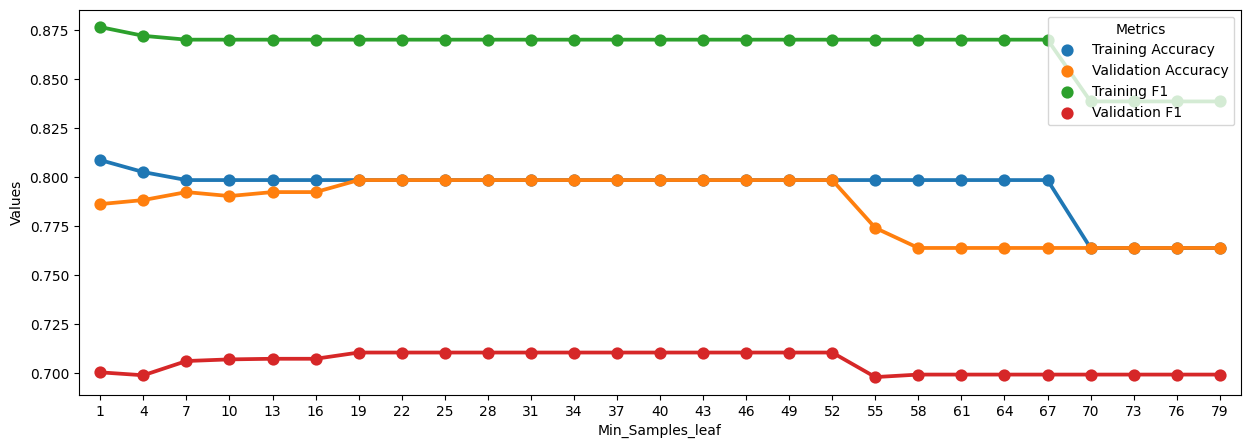

In [30]:
# Initialize lists to store training and validation accuracy, F1 scores, and min_samples_leaf values
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []

# Train and evaluate decision tree models with different min_samples_leaf values from 1 to 80 with a step of 3
for samples_leaf in range(1, 80, 3):
    tree_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=samples_leaf)
    tree_clf.fit(X_train, y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train, y_training_pred)
    train_f1 = f1_score(y_train, y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='accuracy').mean()

    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)

# Store the collected metrics and min_samples_leaf values in a dictionary and convert it to a DataFrame
Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1": val_f1, "Min_Samples_leaf": min_samples_leaf}
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

# Melt the DataFrame for easy plotting with seaborn
plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf', var_name='Metrics', value_name="Values")

# Plot the metrics against min_samples_leaf to visualize the impact of min_samples_leaf on model performance
fig, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x="Min_Samples_leaf", y="Values", hue="Metrics", data=plot_df, ax=ax)


In [31]:
# Import confusion_matrix function from sklearn.metrics
from sklearn.metrics import confusion_matrix

# Train a DecisionTreeClassifier with max_depth set to 3 and min_samples_leaf set to 35
tree_clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)
tree_clf.fit(X_train, y_train)

# Make predictions on the test set using the trained decision tree model
y_pred = tree_clf.predict(X_test_imp)

# Evaluate the model's performance on the test set
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Test F1 Score: ", f1_score(y_test, y_pred))

# Generate and display the confusion matrix on the test data
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Test Accuracy:  0.8536585365853658
Test F1 Score:  0.903225806451613
Confusion Matrix on Test Data


Predicted,False,True,All
True,,,
False,21,17,38
True,1,84,85
All,22,101,123
